# <span style="color:orange" padding-bottom="0">FINAL PROJECT | CODE<br>East 2: Jonathan Gragg, William Johnson, Douglas Wiley</span>


## Libraries

In [1]:
# utilities
import numpy as np
import pandas as pd

# data
from tensorflow.keras.datasets import cifar10

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# classifiers
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Initializations

In [2]:
# plotting
sns.set_palette('Oranges')
sns.color_palette("YlOrBr")

# printing
np.set_printoptions(precision=2)
pd.set_option('precision', 2)

# runtime
import warnings
warnings.filterwarnings('ignore')

In [3]:
 # my functions
def _get_cifar(reduce=False):
    
    # import image data
    (X_train_all, y_train_all), (X_test_all, y_test_all) = cifar10.load_data()
    
    # reduce data size for document rendering purposes
    if(reduce):
        X_train_all, y_train_all = _reduce_cifar(X_train_all, y_train_all)
        X_test_all, y_test_all = _reduce_cifar(X_test_all, y_test_all)
    
    # we only need car and truck images
    train_index = np.where((y_train_all == 1) | (y_train_all == 9))[0] # train
    X_train = X_train_all[train_index]
    y_train = y_train_all[train_index]
    test_index = np.where((y_test_all == 1) | (y_test_all == 9))[0] # test
    X_test = X_test_all[test_index]
    y_test = y_test_all[test_index]
    
    # cnn uses validation datasets
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.5, stratify=y_train, random_state=1)

    # though a multiclass problem, convert labels so we can get recall and precision
    y_train[y_train == 1] = 0
    y_train[y_train == 9] = 1
    y_valid[y_valid == 1] = 0
    y_valid[y_valid == 9] = 1
    y_test[y_test == 1] = 0
    y_test[y_test == 9] = 1
    
    print('X_train shape: {}'.format(X_train.shape))
    print('y_train shape: {}'.format(y_train.shape))
    print('X_valid shape: {}'.format(X_valid.shape))
    print('y_valid shape: {}'.format(y_valid.shape))
    print('X_test shape: {}'.format(X_test.shape))
    print('y_test shape: {}'.format(y_test.shape))
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

def _reduce_cifar(X, y, fraction=0.1):
    
    # recombine image with its label
    df = pd.DataFrame(list(zip(X, y)), columns =['Image', 'label']) 
    
    # get a sample of the data
    val = df.sample(frac=fraction)
    
    # seperate them back out
    X_ = np.array([ i for i in list(val['Image'])])
    y_ = np.array([ [i[0]] for i in list(val['label'])])
    return (X_, y_)

def _classification_metrics(y, y_hat):
    print ('Confusion Matrix') 
    print(confusion_matrix(y, y_hat, labels=[1,0])) 
    print('')
    print ('Classification Report')
    print(classification_report(y, y_hat))
    
def _prob_to_pred(p):
    return list(map(lambda p: int(p[0] <= p[1]), p))


## EDA

X_train shape: (5000, 32, 32, 3)
y_train shape: (5000, 1)
X_valid shape: (5000, 32, 32, 3)
y_valid shape: (5000, 1)
X_test shape: (2000, 32, 32, 3)
y_test shape: (2000, 1)


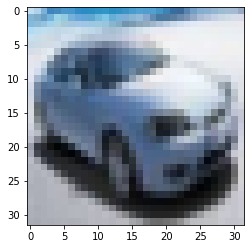

In [4]:
# get image data, don't need validation at this point
X_train, y_train, _, _, X_test, y_test = _get_cifar()

# show an example image
supress = plt.imshow(X_train[1])

In [5]:
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0],)
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0],)

# standardize the training and test data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Non-Neural Net Classifiers

In [6]:
# support vector machines
model_svc = SVC(kernel = 'rbf')
model_svc.fit(X_train, y_train)
preds_svc = model_svc.predict(X_test)
_classification_metrics(y_test, preds_svc)

Confusion Matrix
[[784 216]
 [230 770]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1000
           1       0.77      0.78      0.78      1000

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



In [7]:
# random forest
model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train)
preds_forest = model_forest.predict(X_test)
_classification_metrics(y_test, preds_forest)

Confusion Matrix
[[709 291]
 [261 739]]

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.73      0.71      0.72      1000

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



In [8]:
# Boosted
model_boost = GradientBoostingClassifier()
model_boost.fit(X_train, y_train)
preds_boost = model_boost.predict(X_test)
_classification_metrics(y_test, preds_boost)

Confusion Matrix
[[764 236]
 [291 709]]

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1000
           1       0.72      0.76      0.74      1000

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000



In [9]:
# attempt to improve best overal classifier
def svc_gridsearch(c_list, kernel_list):
    model_svc = SVC()
    grid_svc = GridSearchCV(
        model_svc, 
        param_grid = {'C':c_list, 'kernel':kernel_list}, 
        scoring = 'roc_auc')
    return grid_svc.fit(X_train, y_train)
  
# search parameters
C_LIST = [.5, 1.5]
KERNEL_LIST = ['rbf', 'sigmoid']

# commented out so the pdf generates
grid_svc = svc_gridsearch(C_LIST, KERNEL_LIST)

# returns a best model of c=1.5 and kernel=rbf
print(grid_svc.best_params_)

preds_svc_best = grid_svc.predict(X_test)
_classification_metrics(y_test, preds_svc_best)

{'C': 1.5, 'kernel': 'rbf'}
Confusion Matrix
[[783 217]
 [227 773]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1000
           1       0.78      0.78      0.78      1000

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000



## Neural Net Classifiers

X_train shape: (5000, 32, 32, 3)
y_train shape: (5000, 1)
X_valid shape: (5000, 32, 32, 3)
y_valid shape: (5000, 1)
X_test shape: (2000, 32, 32, 3)
y_test shape: (2000, 1)


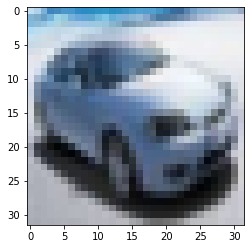

In [10]:
# re-import image data
X_train, y_train, X_valid, y_valid, X_test, y_test = _get_cifar()

# show an example image
supress = plt.imshow(X_train[1])

In [11]:
# cnn model 1
model_cnn_1 = Sequential([
    Conv2D(16, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)), 
    MaxPooling2D(pool_size=(4, 4), strides=4),
    Flatten(),
    Dense(2, activation='softmax')
]) 

model_cnn_1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

model_cnn_1.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=20,
    validation_data=(X_valid, y_valid),
    verbose=False)

model_cnn_1.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.6275 - accuracy: 0.7085


[0.6275333166122437, 0.7085000276565552]

In [12]:
# look at model 1 predictive performance
preds_cnn_1 = model_cnn_1.predict(X_test, verbose=0)
_classification_metrics(y_test, _prob_to_pred(preds_cnn_1))

Confusion Matrix
[[619 381]
 [202 798]]

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.80      0.73      1000
           1       0.75      0.62      0.68      1000

    accuracy                           0.71      2000
   macro avg       0.72      0.71      0.71      2000
weighted avg       0.72      0.71      0.71      2000



In [13]:
# attempt to improve performance with model 2
model_cnn_2 = Sequential([
    Conv2D(64, kernel_size=(3,3), activation='relu', strides=(1,1), kernel_regularizer=keras.regularizers.l1_l2(.001), padding='same', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(6, 6), strides=2),
    Flatten(),
    Dense(40, activation='softmax')
])

model_cnn_2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

model_cnn_2.fit(
    X_train, 
    y_train, 
    epochs=10, 
    batch_size=20,
    validation_data=(X_valid, y_valid),
    verbose=False)

model_cnn_2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.8204 - accuracy: 0.7480


[0.8204043507575989, 0.7480000257492065]

In [14]:
# look at model 2 predictive performance
preds_cnn_2 = model_cnn_2.predict(X_test, verbose=0)
_classification_metrics(y_test, _prob_to_pred(preds_cnn_2))

Confusion Matrix
[[751 249]
 [255 745]]

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1000
           1       0.75      0.75      0.75      1000

    accuracy                           0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000



In [15]:
# further optimization with model 3
model_cnn_3 = Sequential([
    Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=keras.regularizers.l1_l2(.001), padding='same', input_shape=(32,32,3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(rate=.5),
    Dense(2)
])

# define callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model_cnn_3.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

# begin search for optimum batch size
batch_size = [50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155]
accuracy = []
for b_ in batch_size:
    history = model_cnn_3.fit(
        X_train, 
        y_train, 
        epochs=100, 
        batch_size=b_,
        validation_data=(X_valid, y_valid),
        callbacks=[early_stopping],
        verbose=False)
    accuracy.append(model_cnn_3.evaluate(X_test, y_test)[1])

63/63 [==============================] - 0s 7ms/step - loss: 1.7249 - accuracy: 0.8775


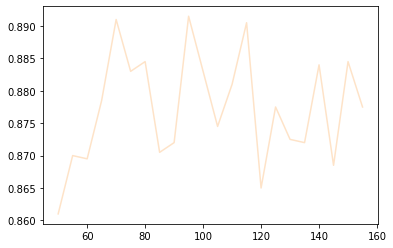

In [16]:
# plot batch size
graph = pd.DataFrame({'batch_size':batch_size, 'accuracy':accuracy})
plt.plot(graph['batch_size'], graph['accuracy'])

In [17]:
# optimum batch size found to be 110
best_batch = graph['batch_size'].loc[graph['accuracy'] == max(graph['accuracy'])]
best_batch

9    95
Name: batch_size, dtype: int64

In [18]:
# run a final model
model_cnn_final = Sequential([
    Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=keras.regularizers.l1_l2(.001), padding='same', input_shape=(32,32,3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(rate=.5),
    Dense(2)
])

model_cnn_final.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

history = model_cnn_final.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=110,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping],
    verbose=False)

model_cnn_final.evaluate(X_test, y_test)

63/63 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8750


[0.4648354649543762, 0.875]

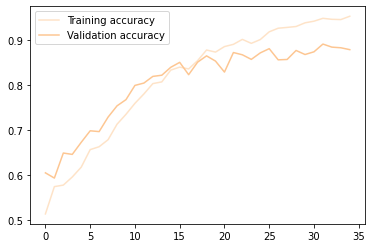

In [19]:
# plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
suppress = plt.legend()

In [20]:
# look at final model predictive performance
preds_cnn_final = model_cnn_final.predict(X_test, verbose=0)
_classification_metrics(y_test, _prob_to_pred(preds_cnn_final))

Confusion Matrix
[[891 109]
 [141 859]]

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1000
           1       0.86      0.89      0.88      1000

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.87      2000
weighted avg       0.88      0.88      0.87      2000

